<a href="https://colab.research.google.com/github/WilliamShengYangHuang/AALU_Workshop_3/blob/main/HOG_Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Feature Extraction: Histogram of Oriented Gradients (HOG)**


Pros:
1.   Maintains good invariance to image geometry and optical deformation
2.   Performs well in feature extraction of rigid objects

Cons:
1.   The feature dimension is large
2.   The amount of calculation is large
3.   Cannot handle occlusion

Common Uses: Contour information capture; pedestrian detection



Reference: https://learnopencv.com/histogram-of-oriented-gradients/

## Load Necessary Packages

In [1]:
from skimage.io import imread
from skimage.io import imshow
from skimage.feature import hog
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage import exposure

import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Image Data

In [2]:
PATH = '/content/drive/My Drive/Estimating+carbon+from+an+NDVI+map.jpg' #@param{type:'string'}

(2160, 2153, 3)
<class 'tuple'>


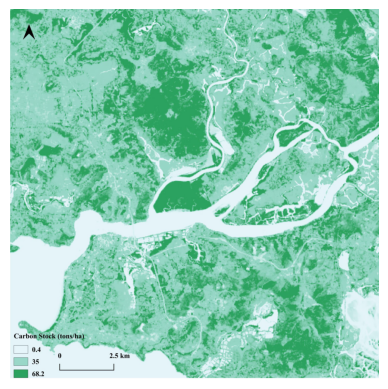

In [3]:
img = imread(PATH)
plt.axis("off")
plt.imshow(img)

print(img.shape)
print(type(img.shape))

## Resize Image

(640, 640, 3)


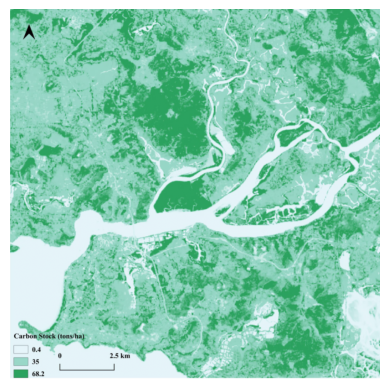

In [4]:
resized_img = resize(img, (640, 640))
plt.axis("off")
plt.imshow(resized_img)
print(resized_img.shape)

## Create and Visualise HOG Features

In [5]:
cell_size = 16 #@param{type:'slider', min:1, max:64, step:1}

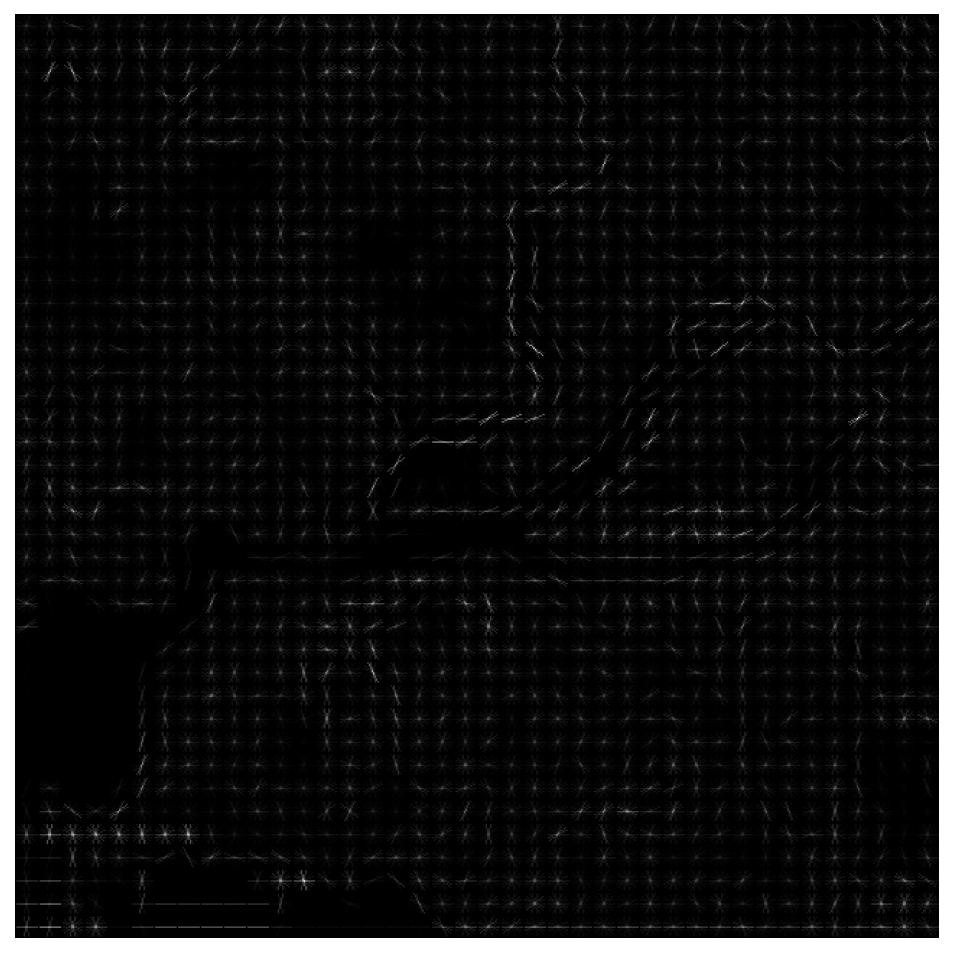

In [7]:
plt.figure(figsize=(8, 8), dpi=150)

# Update 'multichannel' to 'channel_axis'
fd, hog_img = hog(
    resized_img,
    orientations=9,
    pixels_per_cell=(cell_size, cell_size),
    cells_per_block=(2, 2),
    visualize=True,
    channel_axis=-1  # Specify the axis for color channels, usually the last axis (-1)
)

plt.axis("off")
plt.imshow(hog_img, cmap="gray")
plt.show()

In [8]:
fd # feature data in 1d array

array([0.19763384, 0.1030048 , 0.11087902, ..., 0.16174339, 0.16968704,
       0.08877195])

In [9]:
fd.shape # block num(x)*block num(y)*(cell num per block*orientation)

(54756,)

## Binarising HOG Image

In [10]:
import pandas as pd
df = pd.DataFrame(hog_img)
df

,0,1,2,3,4,5,6,7,8,9,...,630,631,632,633,634,635,636,637,638,639
0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.003258,0.000000,0.009981,0.000000,0.000000,0.013974,...,0.011529,0.000000,0.000000,0.006942,0.000000,0.001657,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.000000,0.000000,0.000000,0.003258,0.009981,0.000000,0.000000,0.013974,...,0.011529,0.000000,0.000000,0.006942,0.001657,0.000000,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.004768,0.000000,0.000000,0.003258,0.009981,0.000000,0.000000,0.013974,...,0.011529,0.000000,0.000000,0.006942,0.001657,0.000000,0.000000,0.001601,0.0,0.0
4,0.0,0.0,0.000000,0.004768,0.000000,0.000000,0.003258,0.009981,0.013974,0.007283,...,0.017411,0.011529,0.006942,0.001657,0.000000,0.000000,0.001601,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.0,0.0,0.000000,0.002234,0.000000,0.000000,0.003400,0.046895,0.028069,0.003303,...,0.003768,0.007248,0.011525,0.022030,0.000000,0.000000,0.020998,0.000000,0.0,0.0
636,0.0,0.0,0.002234,0.000000,0.000000,0.003400,0.046895,0.000000,0.000000,0.028069,...,0.007248,0.000000,0.000000,0.011525,0.022030,0.000000,0.000000,0.020998,0.0,0.0
637,0.0,0.0,0.000000,0.000000,0.000000,0.003400,0.046895,0.000000,0.000000,0.028069,...,0.007248,0.000000,0.000000,0.011525,0.022030,0.000000,0.000000,0.000000,0.0,0.0
638,0.0,0.0,0.000000,0.000000,0.003400,0.000000,0.046895,0.000000,0.000000,0.028069,...,0.007248,0.000000,0.000000,0.011525,0.000000,0.022030,0.000000,0.000000,0.0,0.0


In [11]:
threshold = 0.0648 #@param{type:'slider', min:0, max:1, step:0.0001}

In [12]:
binarisation = (df > threshold).astype(int)
binarisation

,0,1,2,3,4,5,6,7,8,9,...,630,631,632,633,634,635,636,637,638,639
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
binarised_df= binarisation.to_numpy()
binarised_df

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

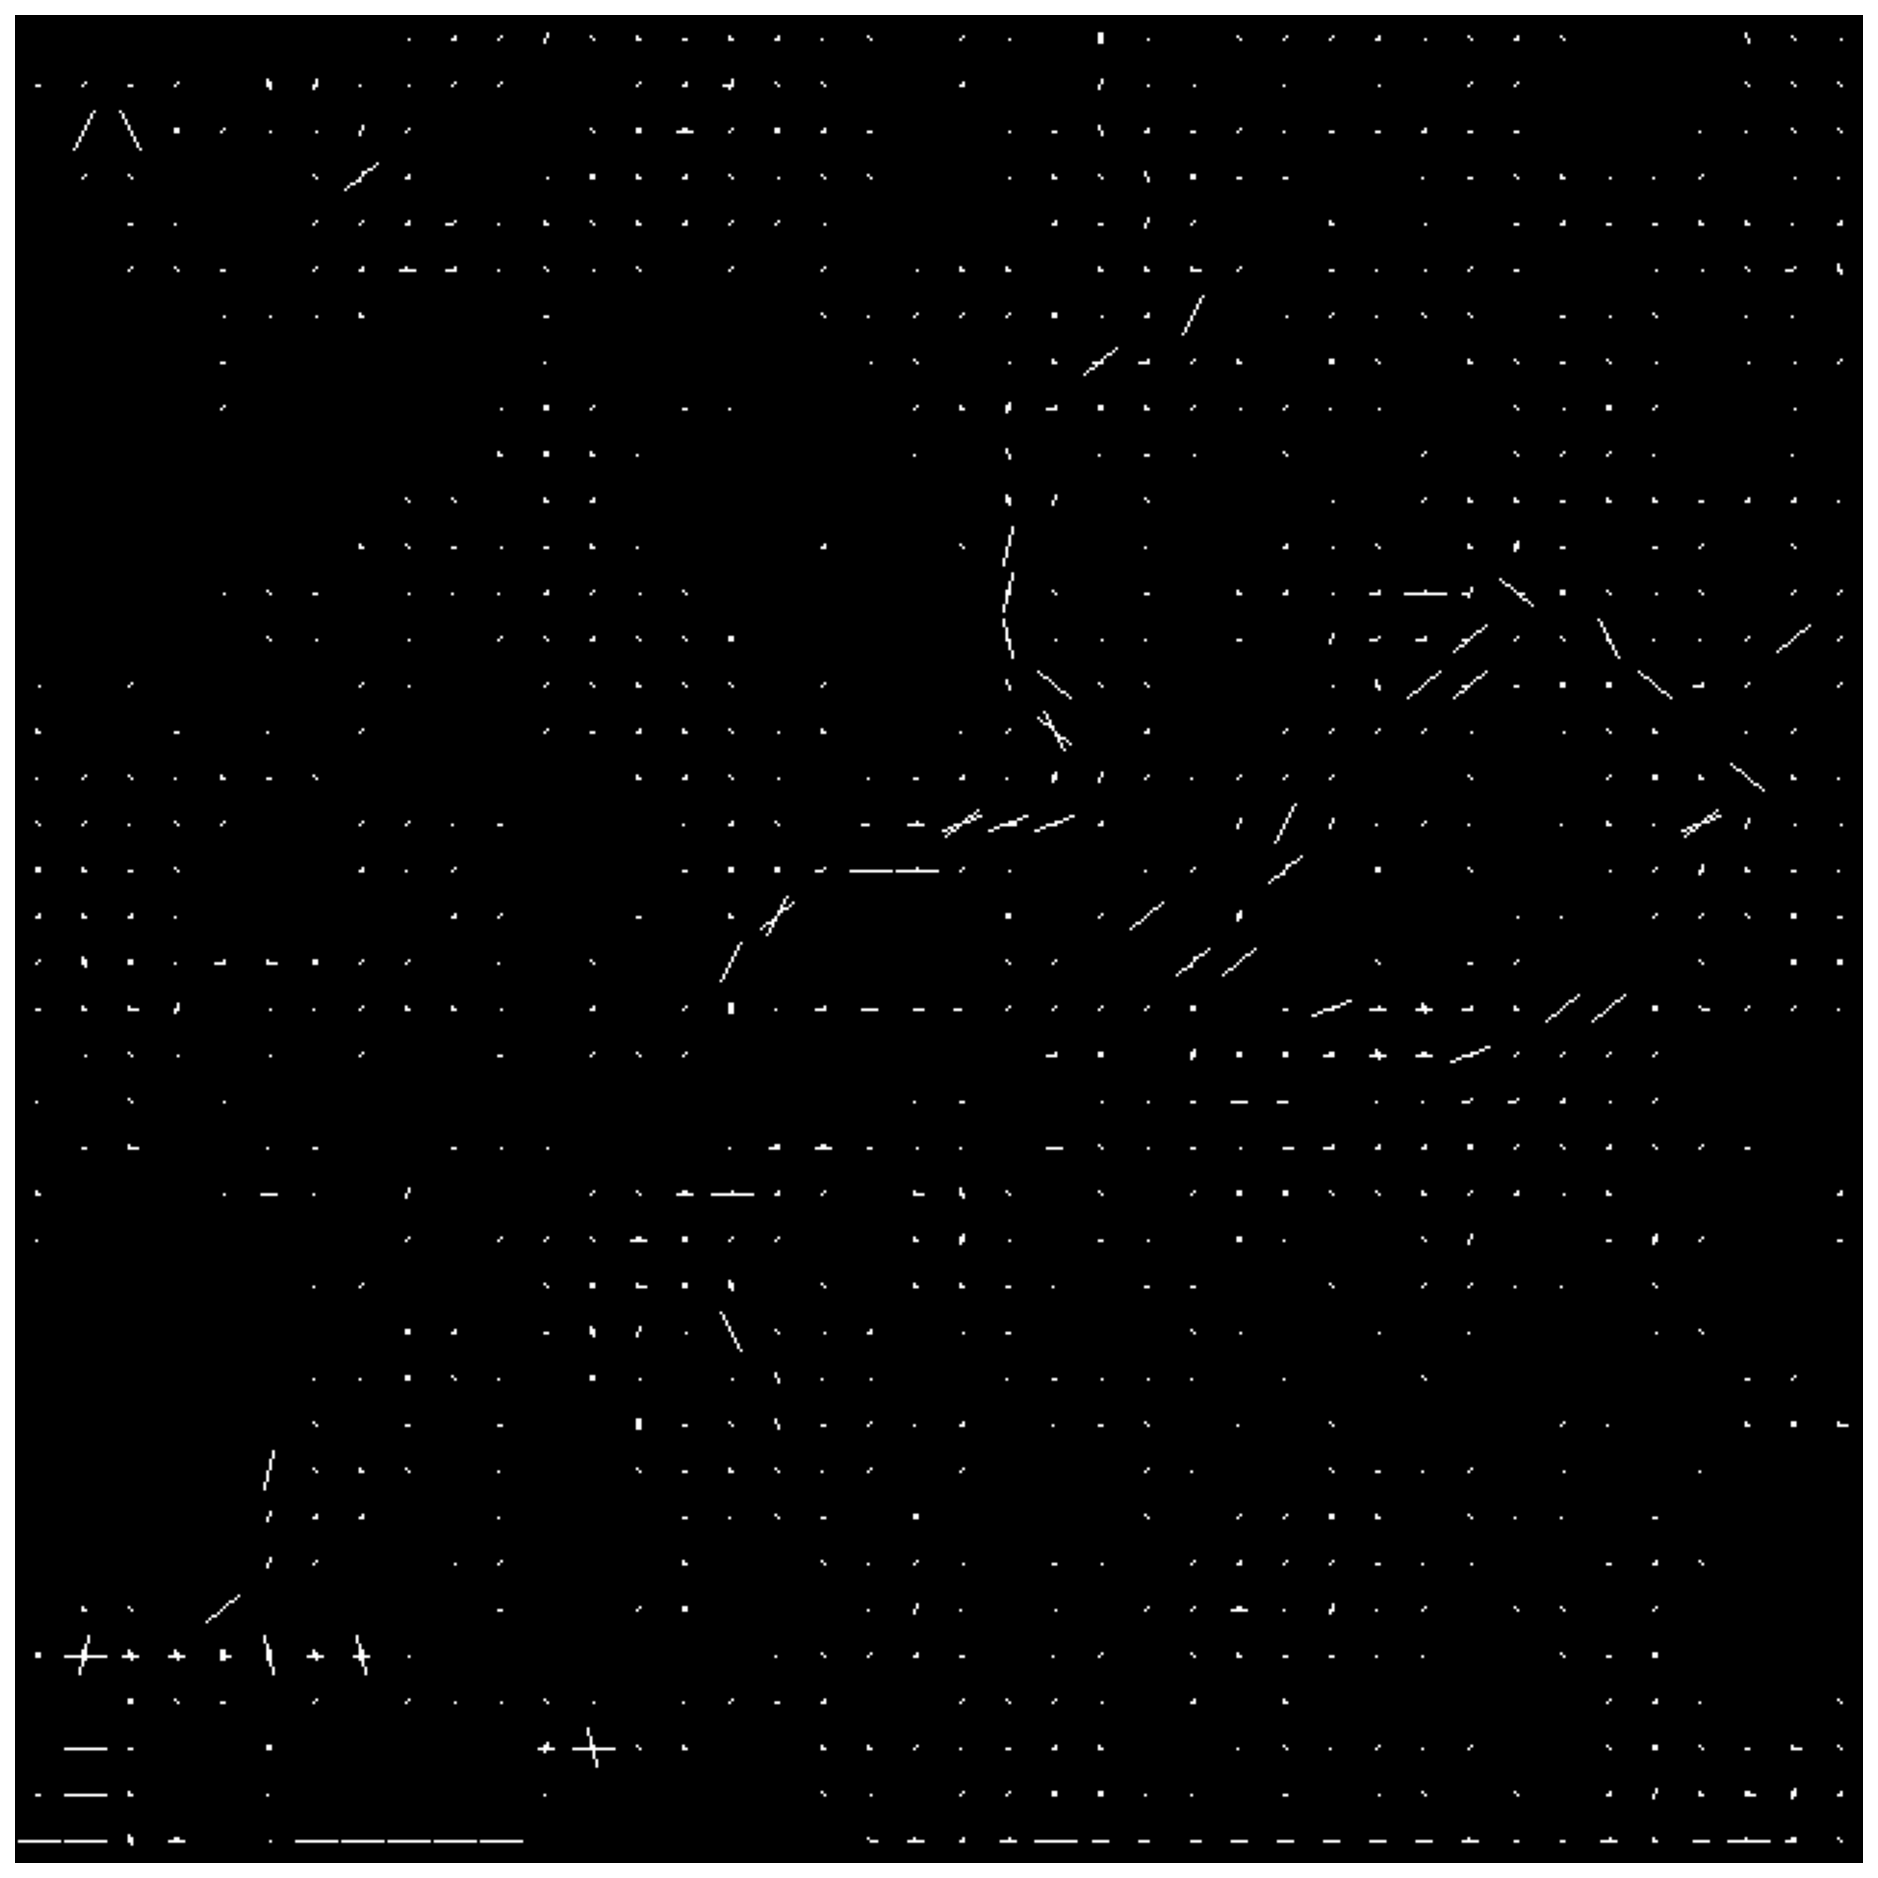

In [14]:
plt.figure(figsize=(16, 16), dpi=150)
plt.axis("off")
plt.imshow(binarised_df, cmap='gray')
plt.show()

In [15]:
import numpy as np
map_data = np.asarray(resized_img)
map_data

array([[[0.65598304, 0.84041109, 0.76643107],
        [0.49947081, 0.79471534, 0.66226544],
        [0.43244916, 0.74392506, 0.59596437],
        ...,
        [0.57629118, 0.81188074, 0.74860764],
        [0.58852076, 0.82462339, 0.7631665 ],
        [0.57713385, 0.81404364, 0.75216995]],

       [[0.5533213 , 0.79718991, 0.70120378],
        [0.35195912, 0.74774655, 0.56858984],
        [0.29017118, 0.68556046, 0.4886689 ],
        ...,
        [0.54547408, 0.82343165, 0.74977088],
        [0.55733546, 0.83670034, 0.76258533],
        [0.55465567, 0.83356724, 0.7595618 ]],

       [[0.43731749, 0.76763752, 0.60272847],
        [0.26522675, 0.69900747, 0.46126506],
        [0.23141876, 0.65629016, 0.42685221],
        ...,
        [0.56561973, 0.82332452, 0.75509617],
        [0.57299693, 0.82984112, 0.76177188],
        [0.56840995, 0.82597728, 0.75772786]],

       ...,

       [[0.93008434, 0.95982303, 0.96158748],
        [0.91078052, 0.95304005, 0.96083376],
        [0.90615079, 0

## Overlapping

Overlap = map(brightness) + HOG(0, 1)

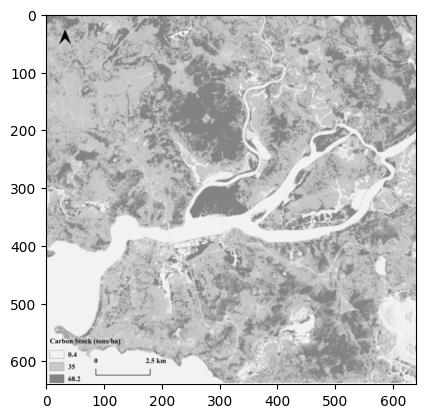

In [16]:
grayscale = rgb2gray(resized_img)
plt.imshow(grayscale, cmap="gray")

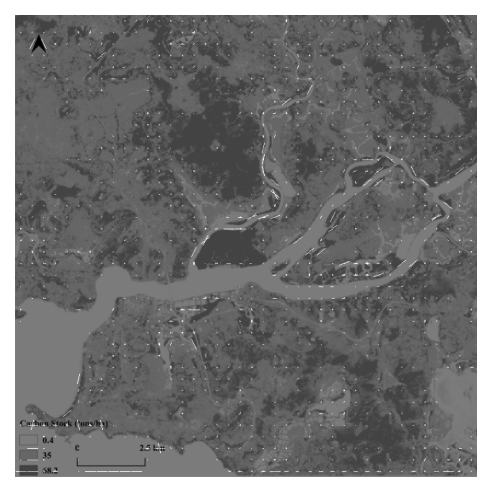

In [17]:
plt.figure(figsize=(4, 4), dpi=150)
new_map = binarised_df + grayscale
plt.axis('off')
plt.imshow(new_map, cmap="gray")

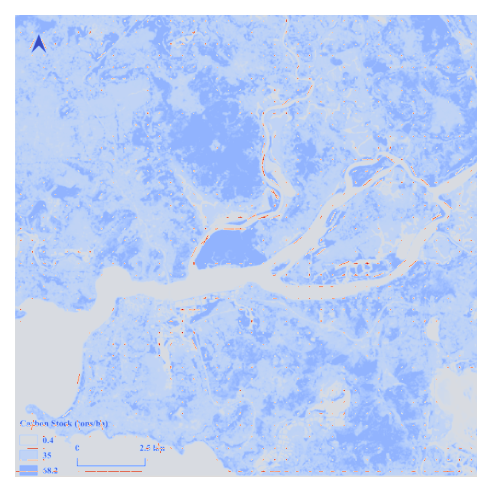

In [18]:
plt.figure(figsize=(4, 4), dpi=150)
plt.axis('off')
plt.imshow(new_map, cmap="coolwarm")

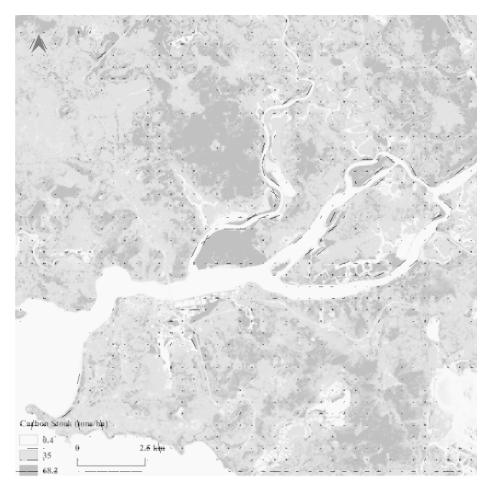

In [19]:
plt.figure(figsize=(4, 4), dpi=150)
new_map_invert = grayscale - binarised_df
plt.axis('off')
plt.imshow(new_map_invert, cmap="gray")

In [20]:
new_map

array([[0.79588617, 0.72242624, 0.66706847, ..., 0.75725597, 0.77002054,
        0.75923921],
       [0.73844723, 0.65072452, 0.58734436, ..., 0.75905472, 0.77199161,
        0.76896274],
       [0.68555457, 0.58968784, 0.54946251, ..., 0.76364298, 0.77035394,
        0.76632344],
       ...,
       [0.95363078, 0.94462182, 0.94569631, ..., 0.9400519 , 0.93810812,
        0.93940995],
       [0.98509759, 0.98197667, 0.98352723, ..., 0.98075731, 0.97979732,
        0.97979905],
       [0.99729852, 0.99736603, 0.99731953, ..., 0.9952114 , 0.99506625,
        0.995066  ]])

In [21]:
new_map_invert

array([[0.79588617, 0.72242624, 0.66706847, ..., 0.75725597, 0.77002054,
        0.75923921],
       [0.73844723, 0.65072452, 0.58734436, ..., 0.75905472, 0.77199161,
        0.76896274],
       [0.68555457, 0.58968784, 0.54946251, ..., 0.76364298, 0.77035394,
        0.76632344],
       ...,
       [0.95363078, 0.94462182, 0.94569631, ..., 0.9400519 , 0.93810812,
        0.93940995],
       [0.98509759, 0.98197667, 0.98352723, ..., 0.98075731, 0.97979732,
        0.97979905],
       [0.99729852, 0.99736603, 0.99731953, ..., 0.9952114 , 0.99506625,
        0.995066  ]])

## Canny Edge Detection

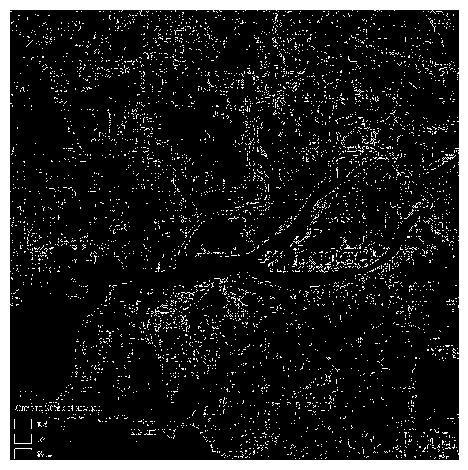

In [22]:
import cv2 as cv

threshold_1 = 283 #@param{type:"slider", min:0, max:512, step:1}
threshold_2 = 143 #@param{type:"slider", min:0, max:512, step:1}

edges = cv.Canny(img, threshold_1, threshold_2)
plt.axis('off')
imshow(edges)